In [150]:
import torch
from torchvision import datasets, transforms
from torchvision import models
from torchmetrics import Accuracy
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_classes = 2 
new_classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=512, out_features=num_classes),
    torch.nn.Softmax() 
)

model.fc = new_classifier

/home/umbilnm/test_vibe/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/umbilnm/test_vibe/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [151]:
data_path = '/home/umbilnm/test_vibe/dataset'
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(400),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
dataset = datasets.ImageFolder(root=data_path, transform=transformations)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [139]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10
for epoch in range(n_epochs):
    print('Epoch ', epoch+1)
    accuracy_metric = Accuracy(task='binary')
    train_accuracy = Accuracy(task='binary')
    model.train()
    for images, labels in train_loader:
        predictions = model(images)
        loss = criterion(predictions, labels)
        train_accuracy.update(predictions.argmax(1), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy.compute():.2f}')

    model.eval()
    for images, labels in test_loader:
        with torch.no_grad():
            
            probs = model(images)
            loss = criterion(probs, labels)
            accuracy_metric.update(probs.argmax(1), labels)
            
    print(f'Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy_metric.compute():.2f}')
    print('---------------------------------')

Epoch  1
Train Loss: 0.8263, Train Accuracy: 0.59
Test Loss: 0.6781, Test Accuracy: 0.47
---------------------------------
Epoch  2
Train Loss: 0.6449, Train Accuracy: 0.61
Test Loss: 0.6088, Test Accuracy: 0.77
---------------------------------
Epoch  3
Train Loss: 0.6793, Train Accuracy: 0.79
Test Loss: 0.5648, Test Accuracy: 0.87
---------------------------------
Epoch  4
Train Loss: 0.5324, Train Accuracy: 0.84
Test Loss: 0.5297, Test Accuracy: 0.93
---------------------------------
Epoch  5
Train Loss: 0.5182, Train Accuracy: 0.86
Test Loss: 0.4919, Test Accuracy: 0.97
---------------------------------
Epoch  6
Train Loss: 0.4522, Train Accuracy: 0.96
Test Loss: 0.4741, Test Accuracy: 1.00
---------------------------------
Epoch  7
Train Loss: 0.4282, Train Accuracy: 0.97
Test Loss: 0.4525, Test Accuracy: 1.00
---------------------------------
Epoch  8
Train Loss: 0.4319, Train Accuracy: 0.96
Test Loss: 0.4277, Test Accuracy: 0.97
---------------------------------
Epoch  9
Train L

In [140]:
for images, labels in test_loader:
    with torch.no_grad():
        
        predictions = model(images).argmax(1)
        accuracy_metric.update(predictions, labels)


In [141]:
torch.save(model.state_dict(), '/home/umbilnm/test_vibe/models/model.pt')

In [105]:
model.state_dict()['fc.0.weight']

tensor([[ 0.0563,  0.0059,  0.0046,  ..., -0.0194,  0.0047,  0.0276],
        [-0.0152,  0.0173, -0.0139,  ...,  0.0413, -0.0237, -0.0210]])

### Тест с переписками

In [157]:
dataset.class_to_idx

{'chat': 0, 'dating': 1, 'photos': 2}

In [159]:
model = models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
num_classes = 3
new_classifier = torch.nn.Sequential(
    torch.nn.Linear(in_features=512, out_features=num_classes),
    torch.nn.Softmax() 
)

model.fc = new_classifier
data_path = '/home/umbilnm/test_vibe/dataset'
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(400),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
dataset = datasets.ImageFolder(root=data_path, transform=transformations)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 10
for epoch in range(n_epochs):
    print('Epoch ', epoch+1)
    accuracy_metric = Accuracy(task='multiclass', num_classes=3)
    train_accuracy = Accuracy(task='multiclass', num_classes=3)
    model.train()
    for images, labels in train_loader:
        predictions = model(images)
        loss = criterion(predictions, labels)
        train_accuracy.update(predictions.argmax(1), labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f'Train Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy.compute():.2f}')

    model.eval()
    for images, labels in test_loader:
        with torch.no_grad():
            
            probs = model(images)
            loss = criterion(probs, labels)
            accuracy_metric.update(probs.argmax(1), labels)
            
    print(f'Test Loss: {loss.item():.4f}, Test Accuracy: {accuracy_metric.compute():.2f}')
    print('---------------------------------')

/home/umbilnm/test_vibe/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/umbilnm/test_vibe/.venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch  1
Train Loss: 1.1756, Train Accuracy: 0.22
Test Loss: 1.0455, Test Accuracy: 0.65
---------------------------------
Epoch  2
Train Loss: 1.0548, Train Accuracy: 0.54
Test Loss: 0.9211, Test Accuracy: 0.65
---------------------------------
Epoch  3
Train Loss: 0.9253, Train Accuracy: 0.62
Test Loss: 0.8649, Test Accuracy: 1.00
---------------------------------
Epoch  4
Train Loss: 0.8812, Train Accuracy: 0.95
Test Loss: 0.8069, Test Accuracy: 1.00
---------------------------------
Epoch  5
Train Loss: 0.9217, Train Accuracy: 0.90
Test Loss: 0.7288, Test Accuracy: 1.00
---------------------------------
Epoch  6
Train Loss: 0.7836, Train Accuracy: 0.96
Test Loss: 0.7052, Test Accuracy: 1.00
---------------------------------
Epoch  7
Train Loss: 0.9333, Train Accuracy: 0.97
Test Loss: 0.6669, Test Accuracy: 1.00
---------------------------------
Epoch  8
Train Loss: 0.8206, Train Accuracy: 0.99
Test Loss: 0.6624, Test Accuracy: 1.00
---------------------------------
Epoch  9
Train L

In [160]:
torch.save(model.state_dict(), '/home/umbilnm/test_vibe/models/model_multiclass.pt')

In [198]:
dataset.class_to_idx

{'chat': 0, 'dating': 1, 'photos': 2}

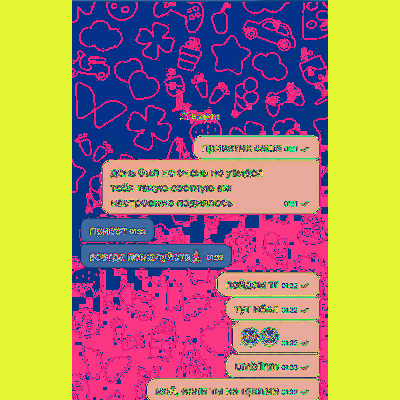

In [210]:
transforms.ToPILImage()(test_dataset[1][0])

In [202]:
transformations = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(400),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])
transformations(test_dataset[0][0])

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>